In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import eigsh
import sympy as sym


from FEM1D import FEM1_1D as fem
import FEM1D

Linear ($k=1$) Finite Element Method solver for the 1D Poisson problem:

$-u''=f \quad \in \Omega=(a,b)^2$

$u(a)=g(a)$ and $u(b)=g(b)$

for $g$ a given function.

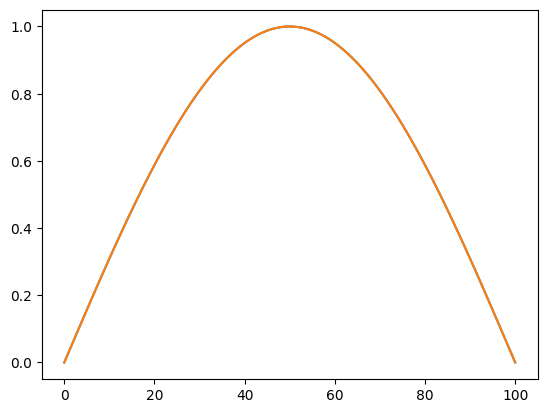

4.1126903210453314e-05


In [2]:
# problem's data
omega = [0,np.pi]
rhs = lambda x: np.sin(x)
exact = lambda x: np.sin(x)

# number of subdivisions
N=100

n_qpoints = 1

# call function computing FEM system
method = fem(omega, N, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), True)
A, F = method.FEM_POISSON()

# solve
A = A.tocsr()
Uh = sp.linalg.spsolve(A,F)

# Evaluate exact solution at grid nodes
x = np.linspace(omega[0],omega[1],N+1)
U = exact(x)

# Plot solutions
plt.plot(Uh)
plt.plot(U)
plt.show()


# compute discrete max norm error
print(max(abs(U-Uh)))

Point 1

Function computing $H^1$-norm error and and test convergence this time for $\| u - u_h \|_{H^1(a,b)}$.

The funtion is FEM1_H1 in FEM1D script.

In [3]:
t = sym.var('t')
my_f = sym.sin(t)

h1_err = method.FEM1_H1(Uh, my_f, t)
print(h1_err)

1.0626033084974295e-08


As it is possible to see from the plot above, the true solution and the approximate with FEM one are overlapping and this is also highlighted by the H1 error norm.

In [4]:
# Initialise error vector
k_array = np.zeros(6)
NN = np.array([50,75,100,125,150,175])
NN_inv = [50**(-2),75**(-2),100**(-2),125**(-2),150**(-2),175**(-2)] # stuff for new version of python problem



# experiments loop
for i, N in enumerate(NN):

    n_qpoints = 10

    # call function computing FEM system
    method = fem(omega, N, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), True)
    A, F = method.FEM_POISSON()

    # solve
    Uh = sp.linalg.spsolve(A,F)

    k_array[i] = method.FEM1_H1(Uh, my_f, t)

C:\Users\matte\AppData\Local\Temp\ipykernel_16300\3969643636.py:18: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Uh = sp.linalg.spsolve(A,F)


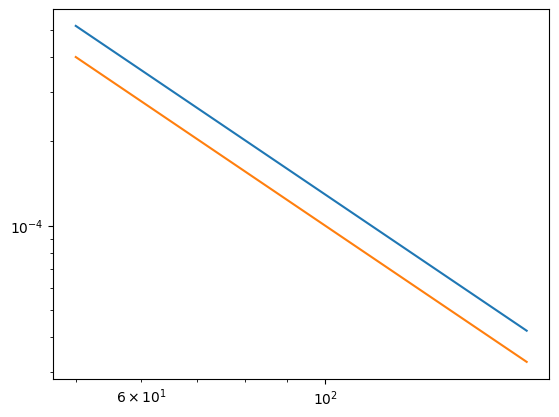

In [5]:
# Usual plot for EOC
plt.loglog(NN,k_array)
plt.loglog(NN,NN_inv) # sorry but problem with inverse on integers in new version of python
plt.show()

The line is parallel to ref. line, emaning theoreticall EOC is respected.

Point 2

Let's do the same analysis, but this time with non uniform grid. Let's try in 1D by building the mesh using exponential spacing with parameter 0.72 (not too aggressive). 

In [6]:
FEM1D.unif_mesh(omega, 100)

array([0.        , 0.03141593, 0.06283185, 0.09424778, 0.12566371,
       0.15707963, 0.18849556, 0.21991149, 0.25132741, 0.28274334,
       0.31415927, 0.34557519, 0.37699112, 0.40840704, 0.43982297,
       0.4712389 , 0.50265482, 0.53407075, 0.56548668, 0.5969026 ,
       0.62831853, 0.65973446, 0.69115038, 0.72256631, 0.75398224,
       0.78539816, 0.81681409, 0.84823002, 0.87964594, 0.91106187,
       0.9424778 , 0.97389372, 1.00530965, 1.03672558, 1.0681415 ,
       1.09955743, 1.13097336, 1.16238928, 1.19380521, 1.22522113,
       1.25663706, 1.28805299, 1.31946891, 1.35088484, 1.38230077,
       1.41371669, 1.44513262, 1.47654855, 1.50796447, 1.5393804 ,
       1.57079633, 1.60221225, 1.63362818, 1.66504411, 1.69646003,
       1.72787596, 1.75929189, 1.79070781, 1.82212374, 1.85353967,
       1.88495559, 1.91637152, 1.94778745, 1.97920337, 2.0106193 ,
       2.04203522, 2.07345115, 2.10486708, 2.136283  , 2.16769893,
       2.19911486, 2.23053078, 2.26194671, 2.29336264, 2.32477

In [7]:
FEM1D.non_uniform_mesh(omega, 100, 1)

array([0.        , 0.03134515, 0.06465129, 0.09493977, 0.12387581,
       0.16001908, 0.18702718, 0.21979706, 0.25246666, 0.28087942,
       0.31121072, 0.34357715, 0.37559455, 0.40654401, 0.44135519,
       0.46910974, 0.50260112, 0.53129511, 0.56629369, 0.59634585,
       0.62797148, 0.66018869, 0.6941658 , 0.72254527, 0.75342032,
       0.78620369, 0.81588449, 0.84750631, 0.87714858, 0.90855296,
       0.94434658, 0.97303682, 1.0083723 , 1.03850381, 1.06995586,
       1.10080467, 1.13254798, 1.15988019, 1.19214513, 1.22466191,
       1.25886616, 1.29047148, 1.32095554, 1.34993247, 1.38395349,
       1.41345426, 1.4465805 , 1.47609775, 1.50827457, 1.53819757,
       1.56856806, 1.6011335 , 1.63210598, 1.66482975, 1.69357454,
       1.72726038, 1.758316  , 1.79238644, 1.82334882, 1.85499845,
       1.88632375, 1.91916748, 1.95054113, 1.97890772, 2.01293174,
       2.04486081, 2.07536312, 2.10619427, 2.13813965, 2.16780231,
       2.20138939, 2.2325188 , 2.26139874, 2.29303389, 2.32312

Now, compute the $h_{max}$ for both of them

In [8]:
np.diff(FEM1D.unif_mesh(omega, 100)).max()

np.float64(0.0314159265358982)

In [9]:
np.diff(FEM1D.non_uniform_mesh(omega, 100, 1)).max()

np.float64(0.03697315878922436)

Those are the two grids, for a comparison.

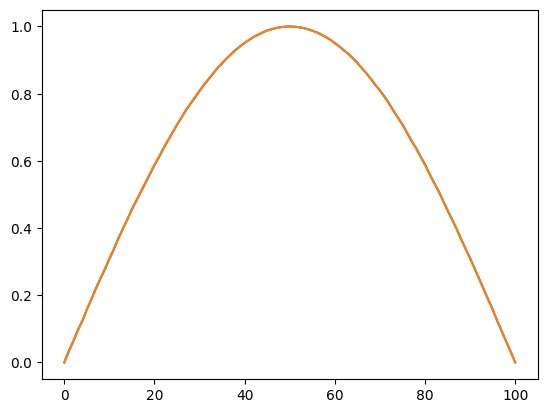

0.0030451450619417217


In [10]:
# problem's data
omega = [0,np.pi]
rhs = lambda x: np.sin(x)
exact = lambda x: np.sin(x)

# number of subdivisions
N=100

n_qpoints = 1

# call function computing FEM system
method = fem(omega, N, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), False)
A, F = method.FEM_POISSON()

# solve
A = A.tocsr()
Uh = sp.linalg.spsolve(A,F)

# Evaluate exact solution at grid nodes
x = np.linspace(omega[0],omega[1],N+1)
U = exact(x)

# Plot solutions
plt.plot(Uh)
plt.plot(U)
plt.show()


# compute discrete max norm error
print(max(abs(U-Uh)))

The choice of the non uniform grid is a random perturbation of the uniform mesh:

* define the $h$ of the uniform grid
* define a parameter $l = 0.1$
* randomly sample $k$ ~ $Unif(-1;1)$
* Add to the node os the uniform grid $l*k$ (Not on the first and last node, since boundary node)



It is possible to notice that the solution is close to the true one, however if the discrete maximum norm error in the uniform case was 4.1126903210453314e-05, now it increased to 0.0030451450619417217

In [11]:
# Initialise error vector
k_array = np.zeros(6)

# experiments loop
for i, N in enumerate(NN):

    n_qpoints = 10

    # call function computing FEM system
    method = fem(omega, N, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), True)
    A, F = method.FEM_POISSON()

    # solve
    Uh = sp.linalg.spsolve(A,F)

    k_array[i] = method.FEM1_H1(Uh, my_f, t)

C:\Users\matte\AppData\Local\Temp\ipykernel_16300\771132173.py:14: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  Uh = sp.linalg.spsolve(A,F)


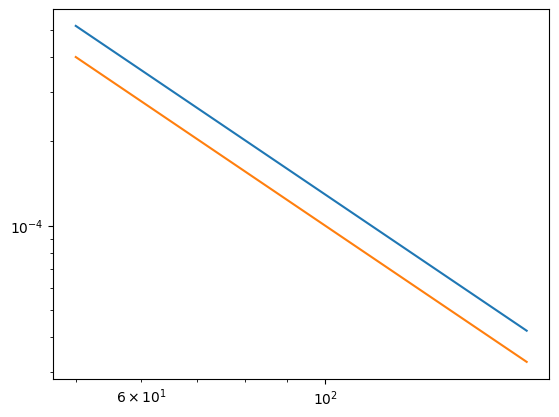

In [12]:
# Usual plot for EOC
plt.loglog(NN,k_array)
plt.loglog(NN,NN_inv) # sorry but problem with inverse on integers in new version of python
plt.show()

EOC respected.

Point 3

Solve general stationary reaction-advection-diffusion problems (Elliptic PDE)

$-a(x)u''(x)+b(x)u'(x)+c(x)u(x)=f$, with data same as before.

Let's set, for simplicity: $a = 2$, $b = 1$ and $c = 1$.

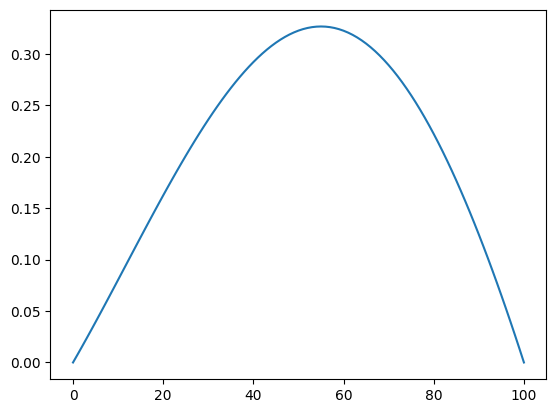

In [13]:
# problem's data
omega = [0,np.pi]
rhs = lambda x: np.sin(x)

# number of subdivisions
N=100

n_qpoints = 10

# call function computing FEM system
method = fem(omega, N, n_qpoints, rhs, rhs(omega[0]), rhs(omega[1]), True)
A, F = method.FEM_GEN(lambda x: 2, lambda x: 1, lambda x: 1)

# solve
A = A.tocsr()
Uh = sp.linalg.spsolve(A,F)

# Plot solutions
plt.plot(Uh)
plt.show()